In [1]:
import pandas as pd
import seaborn as sb
import joblib

In [64]:
data = joblib.load("/Users/english/code/kfdphase/test/bench_kdp/data.jl")

# Separate out the variants from the base VCF and add new columns of the base/comp ids
base = data[data['state'].isin(['tpbase', 'fn'])].copy()
base['base_id'] = base['MatchId'].apply(lambda x: x[0])
base['comp_id'] = base['MatchId'].apply(lambda x: x[1])

# Separate out the variants from the comparison VCF and add new columns of the base/comp ids
comp = data[data['state'].isin(['tp', 'fp'])].copy()
comp['base_id'] = comp['MatchId'].apply(lambda x: x[0])
comp['comp_id'] = comp['MatchId'].apply(lambda x: x[1])

# Merge the base/comparison variants
combined = pd.merge(base, comp, left_on='base_id', right_on='comp_id', suffixes=('_base', '_comp'))

In [65]:
combined['b_ac'] = combined['HG002_GT_base'].apply(lambda x: sum([_ if _ is not None else 0 for _ in x]))
combined['c_ac'] = combined['HG002_kdp_GT_comp'].apply(lambda x: sum([_ if _ is not None else 0 for _ in x]))

In [66]:
columns = ['chrom_base', 'start_base', 'end_base'] + [_ for _ in combined.columns if "Pct" in _] 
columns += ['b_ac', 'c_ac', 'state_base', 'state_comp', "MatchId_comp", "MatchId_base"]
columns += ['base_id_base', 'comp_id_comp']

In [67]:
correct = combined['b_ac'] == combined['c_ac']
print(correct.sum()/len(correct))
correct.value_counts()

0.8404147363776748


True     19048
False     3617
Name: count, dtype: int64

In [68]:
combined[~correct & (combined['state_base'] == 'tpbase') & (combined['c_ac'] == 0)].sample(10, random_state=23)[columns]

,chrom_base,start_base,end_base,PctSeqSimilarity_base,PctSizeSimilarity_base,PctRecOverlap_base,PctSeqSimilarity_comp,PctSizeSimilarity_comp,PctRecOverlap_comp,b_ac,c_ac,state_base,state_comp,MatchId_comp,MatchId_base,base_id_base,comp_id_comp
13638,chr12,131627111,131627112,0.9169,0.8462,0.8352,0.9169,0.8462,0.8352,1,0,tpbase,tp,"(5306.0, 5306.0)","(5306.0, 5306.0)",5306.0,5306.0
17525,chr19,570626,570627,0.9982,0.9965,1.0000,0.9982,0.9965,1.0000,2,0,tpbase,tp,"(9923.0, 9923.0)","(9923.0, 9923.0)",9923.0,9923.0
1792,chr2,33731162,33731163,0.9367,0.8795,0.6265,0.9367,0.8795,0.6265,1,0,tpbase,tp,"(11124.0, 11124.0)","(11124.0, 11124.0)",11124.0,11124.0
4030,chr3,195479533,195479789,0.8593,0.7658,0.4461,0.8593,0.7658,0.4461,1,0,tpbase,tp,"(15434.2, 15434.2)","(15434.2, 15434.2)",15434.2,15434.2
15633,chr16,2442427,2442659,0.9712,0.9437,0.9440,0.9712,0.9437,0.9440,1,0,tpbase,tp,"(7648.0, 7648.0)","(7648.0, 7648.0)",7648.0,7648.0
4799,chr4,110083966,110083967,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1,0,tpbase,tp,"(16362.0, 16362.0)","(16362.0, 16362.0)",16362.0,16362.0
10844,chr10,3457751,3457842,0.8967,0.9783,0.0000,0.9959,0.9973,0.1762,1,0,tpbase,tp,"(1883.3, 1883.1)","(1883.1, 1883.0)",1883.1,1883.1
16842,chr17,82150388,82150479,0.8780,0.8000,0.0000,NaN,0.6111,NaN,2,0,tpbase,fp,"(9140.0, 9140.0)","(9140.0, 9140.1)",9140.0,9140.0
4327,chr4,16739710,16739711,0.8750,0.8108,0.0000,0.8750,0.8108,0.0000,1,0,tpbase,tp,"(15766.0, 15766.0)","(15766.0, 15766.0)",15766.0,15766.0
10287,chr9,87915361,87918831,1.0000,1.0000,1.0000,0.9997,1.0000,0.5499,1,0,tpbase,tp,"(23069.0, 23069.0)","(23069.0, 23069.1)",23069.0,23069.0


In [55]:
view = combined[combined['state_base'] == 'tpbase']

In [56]:
view[(view['c_ac'] == 0) & (view['TruScore_base'] >= 95)]

,chrom_base,start_base,end_base,id_base,svtype_base,svlen_base,szbin_base,qual_base,filter_base,is_pass_base,...,HG002_kdp_PF_comp,HG002_kdp_SZ_ref_comp,HG002_kdp_SZ_alt_comp,HG002_kdp_CS_ref_comp,HG002_kdp_CS_alt_comp,HG002_kdp_PG_comp,base_id_comp,comp_id_comp,b_ac,c_ac
45,chr1,2401340,2401341,None,INS,254,"[200,300)",30,[],True,...,None,NaN,NaN,NaN,NaN,None,67.1,67.1,1,0
81,chr1,3587856,3587857,None,INS,357,"[300,400)",30,[],True,...,None,NaN,NaN,NaN,NaN,None,105.0,105.0,1,0
90,chr1,3693945,3693946,None,INS,105,"[100,200)",30,[],True,...,None,NaN,NaN,NaN,NaN,None,112.2,112.1,1,0
174,chr1,8912171,8912172,None,INS,412,"[400,600)",30,[],True,...,None,NaN,NaN,NaN,NaN,None,207.0,207.1,1,0
329,chr1,29723863,29723864,None,INS,378,"[300,400)",30,[],True,...,None,NaN,NaN,NaN,NaN,None,389.0,389.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20152,chrX,135645944,135646169,None,DEL,224,"[200,300)",30,[],True,...,None,NaN,NaN,NaN,NaN,None,24306.0,24306.0,1,0
20178,chrX,143655448,143656624,None,DEL,1175,"[1k,2.5k)",30,[],True,...,None,NaN,NaN,NaN,NaN,None,24343.1,24343.1,1,0
20187,chrX,145495432,145495497,None,DEL,64,"[50,100)",30,[],True,...,None,NaN,NaN,NaN,NaN,None,24348.1,24348.1,1,0
20219,chrX,151373641,151373642,None,INS,260,"[200,300)",30,[],True,...,None,NaN,NaN,NaN,NaN,None,24395.0,24395.0,1,0


/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/english/py/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When groupin

<Axes: xlabel='TruScore_base', ylabel='Count'>

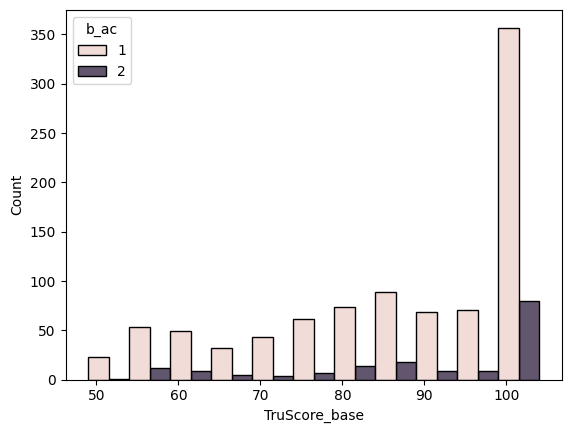

In [57]:
sb.histplot(data=view[view['c_ac'] == 0], x="TruScore_base", hue='b_ac', binwidth=5, multiple='dodge')

In [29]:
combined.iloc[6302][columns]

PctSeqSimilarity_base                    1.0
PctSizeSimilarity_base                   1.0
PctRecOverlap_base                       1.0
PctSeqSimilarity_comp                    1.0
PctSizeSimilarity_comp                   1.0
PctRecOverlap_comp                       1.0
b_ac                                       2
c_ac                                       2
state_base                            tpbase
state_comp                                tp
MatchId_comp              (17197.0, 17197.0)
MatchId_base              (17197.0, 17197.0)
base_id_base                         17197.0
comp_id_comp                         17197.0
Name: 6302, dtype: object